## Attribute Info.
1) S1 "Suit of card #1" Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

2) C1 "Rank of card #1" Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

3) S2 "Suit of card #2" Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

4) C2 "Rank of card #2" Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

5) S3 "Suit of card #3" Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

6) C3 "Rank of card #3" Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

7) S4 "Suit of card #4" Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

8) C4 "Rank of card #4" Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

9) S5 "Suit of card #5" Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

10) C5 "Rank of card 5" Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

11) CLASS "Poker Hand" Ordinal (0-9)

0: Nothing in hand; not a recognized poker hand

1: One pair; one pair of equal ranks within five cards

2: Two pairs; two pairs of equal ranks within five cards

3: Three of a kind; three equal ranks within five cards

4: Straight; five cards, sequentially ranked with no gaps

5: Flush; five cards with the same suit

6: Full house; pair + different rank three of a kind

7: Four of a kind; four equal ranks within five cards

8: Straight flush; straight + flush

9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

In [11]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from C:\Users\shlok\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\shlok\AppData\Local\Temp\tmpnkmbqlk9
  JVM stdout: C:\Users\shlok\AppData\Local\Temp\tmpnkmbqlk9\h2o_shlok_started_from_python.out
  JVM stderr: C:\Users\shlok\AppData\Local\Temp\tmpnkmbqlk9\h2o_shlok_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.9
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_shlok_b13hxc
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [12]:
data = h2o.import_file("poker.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
data.shape

(25010, 12)

In [4]:
data.head()

C1C1,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,Zero
1,1,4,3,6,1,12,3,11,2,7,Zero
2,1,11,4,1,3,7,4,11,2,1,Two
3,2,9,2,4,3,6,1,9,4,9,Three
4,1,8,2,4,2,11,2,2,2,1,Zero
5,2,5,1,5,2,13,2,3,3,13,Two
6,3,10,4,6,1,4,2,13,4,5,Zero
7,4,10,3,1,2,13,4,2,4,7,Zero
8,3,2,4,10,3,3,4,4,1,9,Zero
9,2,7,3,8,4,8,2,13,2,12,One


In [7]:
data.columns

['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'hand']

In [6]:
data = data.drop([ 'C1C1'], axis=1)


In [8]:
# Define features (or predictors) manually
features =['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']

In [9]:
# Split the H2O data frame into training/test sets
# so we can evaluate out-of-bag performance
data_split = data.split_frame(ratios = [0.9], seed = 1234)

data_train = data_split[0] # using 90% for training
data_test = data_split[1]  # using the rest 10% for out-of-bag evaluation

In [10]:
data_train.shape

(22480, 11)

In [11]:
data_test.shape

(2530, 11)

In [12]:
data_train

S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
4,9,2,1,2,2,4,7,2,8,Zero
1,4,3,6,1,12,3,11,2,7,Zero
1,11,4,1,3,7,4,11,2,1,Two
1,8,2,4,2,11,2,2,2,1,Zero
2,5,1,5,2,13,2,3,3,13,Two
3,10,4,6,1,4,2,13,4,5,Zero
4,10,3,1,2,13,4,2,4,7,Zero
3,2,4,10,3,3,4,4,1,9,Zero
2,5,1,3,2,10,3,2,2,1,Zero
1,6,2,12,4,7,2,10,1,1,Zero


## Generalized Linear Model

In [13]:
#Setting Parameters for grid search
hyper_parameters = { 'alpha': [0.01,0.1,0.3,0.5,0.7,0.9], 
                     'lambda': [1e-4,1e-5,1e-6,1e-7,1e-8] }

search_criteria = { 'strategy': "RandomDiscrete", 'seed': 42,
                    'stopping_metric': "AUTO", 
                    'stopping_tolerance': 0.001,
                    'stopping_rounds': 2 }

In [14]:
# Build a Generalized Linear Model (GLM) with default settings

# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch


glm_gridSearch = H2OGridSearch(H2OGeneralizedLinearEstimator(model_id = 'glm_hyperParam', family='multinomial', nfolds=5),
                               hyper_parameters, 
                               grid_id="glm_gridSearch", 
                               search_criteria=search_criteria)

In [15]:
glm_girdSearch_fit = glm_gridSearch.train(x = features,
                                         y = 'hand',
                                         training_frame = data_train)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [17]:
glm_gridPerformance = glm_gridSearch.get_grid(sort_by='accuracy', decreasing=True)

In [18]:
print(glm_gridPerformance)

      alpha    lambda               model_ids            accuracy
0    [0.01]  [1.0E-4]  glm_gridSearch_model_2  0.5008451957295373
1     [0.9]  [1.0E-7]  glm_gridSearch_model_3  0.5008451957295373
2     [0.3]  [1.0E-6]  glm_gridSearch_model_5  0.5008007117437723
3    [0.01]  [1.0E-8]  glm_gridSearch_model_1  0.5008007117437723
4     [0.1]  [1.0E-7]  glm_gridSearch_model_4  0.5008007117437723
5     [0.9]  [1.0E-5]  glm_gridSearch_model_8  0.5008007117437723
6     [0.3]  [1.0E-7]  glm_gridSearch_model_0  0.5008007117437723
7    [0.01]  [1.0E-6]  glm_gridSearch_model_6  0.5008007117437723
8     [0.1]  [1.0E-8]  glm_gridSearch_model_7  0.5008007117437723



## Distributed Random Forest

In [19]:
# DRF hyperparameters
drf_params = {'mtries': [3, 6, 9] }

In [20]:
# Build a Distributed Random Forest (DRF) model with default settings

# Import the function for DRF
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [21]:

drf_gridSearch = H2OGridSearch(H2ORandomForestEstimator(seed = 1234, model_id = 'drf_hyperParam'), 
                                   hyper_params = drf_params,
                                   search_criteria = {'strategy': "Cartesian"}, 
                                   grid_id = "drf_gridSearch" )

In [22]:
drf_gridSearch.train(x = features, y = 'hand', training_frame = data_train)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [24]:
drf_gridPerformance = drf_gridSearch.get_grid(sort_by='accuracy', decreasing=True)
drf_gridPerformance

    mtries               model_ids            accuracy
0        6  drf_gridSearch_model_1   0.617126334519573
1        9  drf_gridSearch_model_2  0.6145907473309609
2        3  drf_gridSearch_model_0  0.5884786476868327


## Gradient Boosting Machines

In [25]:
# Import H2O Grid Search:
from h2o.grid.grid_search import H2OGridSearch

# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [26]:
# GBM hyperparameters
gbm_params = {'learn_rate': [0.01, 0.1], 
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

In [27]:
gbm_gridSearch = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params)
gbm_gridSearch.train(x=features, y='hand', 
                training_frame=data_train, 
                ntrees=100,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [28]:
gbm_gridPerf = gbm_gridSearch.get_grid(sort_by='accuracy', decreasing=True)
gbm_gridPerf

     col_sample_rate learn_rate max_depth sample_rate           model_ids  \
0                1.0        0.1         9         0.8  gbm_grid1_model_17   
1                1.0        0.1         9         1.0  gbm_grid1_model_35   
2                0.5        0.1         9         0.8  gbm_grid1_model_16   
3                0.5        0.1         9         1.0  gbm_grid1_model_34   
4                0.2        0.1         9         0.8  gbm_grid1_model_15   
5                0.2        0.1         9         1.0  gbm_grid1_model_33   
6                1.0       0.01         9         0.8  gbm_grid1_model_14   
7                0.5       0.01         9         1.0  gbm_grid1_model_31   
8                0.5       0.01         9         0.8  gbm_grid1_model_13   
9                1.0       0.01         9         1.0  gbm_grid1_model_32   
10               1.0        0.1         5         0.8  gbm_grid1_model_11   
11               1.0        0.1         5         1.0  gbm_grid1_model_29   

## Deep Learning

In [29]:
# Build a Deep Learning (Deep Neural Networks, DNN) model with default settings

# Import the function for DNN
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [30]:
# DL hyperparameters
activation_opt = ["Rectifier", "RectifierWithDropout", "Maxout", "MaxoutWithDropout"]
l1_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l2_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
dl_params = {'activation': activation_opt, 'l1': l1_opt, 'l2': l2_opt}

In [31]:
# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_runtime_secs': 120, 'seed':1}

In [32]:
dl_gridSearch = H2OGridSearch(model=H2ODeepLearningEstimator,
                        grid_id='dl_grid',
                        hyper_params=dl_params,
                        search_criteria=search_criteria)

In [33]:
dl_gridSearch.train(x=features, y='hand',
              training_frame=data_train,              
              hidden=[10,10],          
              search_criteria=search_criteria)


deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [35]:
dl_gridPerf = dl_gridSearch.get_grid(sort_by='accuracy', decreasing=True)
dl_gridPerf

                  activation      l1      l2          model_ids  \
0                  Rectifier   0.001   0.001  dl_grid_model_101   
1                  Rectifier     0.0  1.0E-4  dl_grid_model_141   
2                     Maxout   0.001     0.0   dl_grid_model_51   
3                     Maxout  1.0E-4  1.0E-5  dl_grid_model_108   
4                     Maxout  1.0E-5  1.0E-4   dl_grid_model_18   
5                     Maxout  1.0E-4    0.01  dl_grid_model_117   
6                     Maxout   0.001   0.001   dl_grid_model_40   
7                  Rectifier   0.001  1.0E-4   dl_grid_model_92   
8                     Maxout   0.001    0.01   dl_grid_model_60   
9                     Maxout     0.0  1.0E-4   dl_grid_model_29   
10                    Maxout  1.0E-4  1.0E-4  dl_grid_model_116   
11                 Rectifier     0.0   0.001   dl_grid_model_99   
12                    Maxout  1.0E-5    0.01   dl_grid_model_20   
13                    Maxout  1.0E-4   0.001   dl_grid_model_5

## AutoML

In [36]:
from h2o.automl import H2OAutoML

Run AutoML, stopping after 60 seconds. The max_runtime_secs argument provides a way to limit the AutoML run by time. When using a time-limited stopping criterion, the number of models train will vary between runs. If different hardware is used or even if the same machine is used but the available compute resources on that machine are not the same between runs, then AutoML may be able to train more models on one run vs another.

The test frame is passed explicitly to the leaderboard_frame argument here, which means that instead of using cross-validated metrics, we use test set metrics for generating the leaderboard.

In [37]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "Poker_leaderboard")
aml.train(y = 'hand', training_frame = data_train, leaderboard_frame = data_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [38]:
aml.leaderboard.head()

model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_BestOfFamily_0_AutoML_20181027_152439,0.463967,0.857257,0.535917,0.287207
StackedEnsemble_AllModels_0_AutoML_20181027_152439,0.463967,0.857257,0.535917,0.287207
XRT_0_AutoML_20181027_152439,0.470453,1.00746,0.552943,0.305746
DRF_0_AutoML_20181027_152439,0.573736,1.28255,0.560817,0.314516


In [39]:
pred = aml.predict(data_test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p9,Eight,Five,Four,One,Seven,Six,Three,Two,Zero
One,0.000773191,0.000809348,0.000398427,0.00286031,0.580109,0.000284813,0.00135395,0.0251126,0.0536267,0.334671
One,0.000781677,0.000888477,0.000247299,0.00214735,0.600237,0.000259387,0.0013797,0.0219943,0.0530831,0.318982
Zero,0.000134592,0.000131009,0.00202952,0.000169496,0.235629,2.64948e-05,4.79587e-05,0.0015802,0.00895678,0.751295
Zero,9.86592e-05,8.69823e-05,0.00230193,9.82705e-05,0.198442,1.72461e-05,2.16285e-05,0.00102519,0.00605214,0.791856
Zero,0.000159782,0.000143294,0.00211842,0.000244541,0.266593,3.46817e-05,5.7786e-05,0.00223299,0.0105456,0.71787
Zero,0.000215336,0.00019392,0.00201223,0.000431076,0.309456,5.35302e-05,9.81536e-05,0.00362936,0.0157105,0.6682
Zero,0.000128298,0.000126518,0.00265587,0.000185159,0.217543,2.55462e-05,4.96356e-05,0.00160723,0.00789554,0.769783
One,0.00117583,0.00173501,4.28743e-05,0.0146143,0.615764,0.000584556,0.00222143,0.0460647,0.110688,0.207109
One,0.000592118,0.000542824,0.000834607,0.00203103,0.56976,0.000210092,0.000561244,0.0189829,0.0549913,0.351494
One,0.0037461,0.00493533,0.0040561,0.00726069,0.49731,0.000654958,0.00410273,0.0356785,0.0859571,0.356299


In [40]:
h2o.cluster().shutdown()

H2O session _sid_8ab1 closed.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn import cross_validation, metrics   

df = pd.read_csv('poker.csv')
X = df.drop(['hand'],axis=1)
y = df['hand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

C:\Users\shlok\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [6]:
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [8]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [9]:
drf_default = H2ORandomForestEstimator(model_id = 'drf_default',seed =1234)

In [14]:
features =['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']

data_split = data.split_frame(ratios = [0.9], seed = 1234)

data_train = data_split[0] # using 90% for training
data_test = data_split[1]
drf_default.train(x= features, y= 'hand', training_frame= data_train)


drf Model Build progress: |███████████████████████████████████████████████| 100%


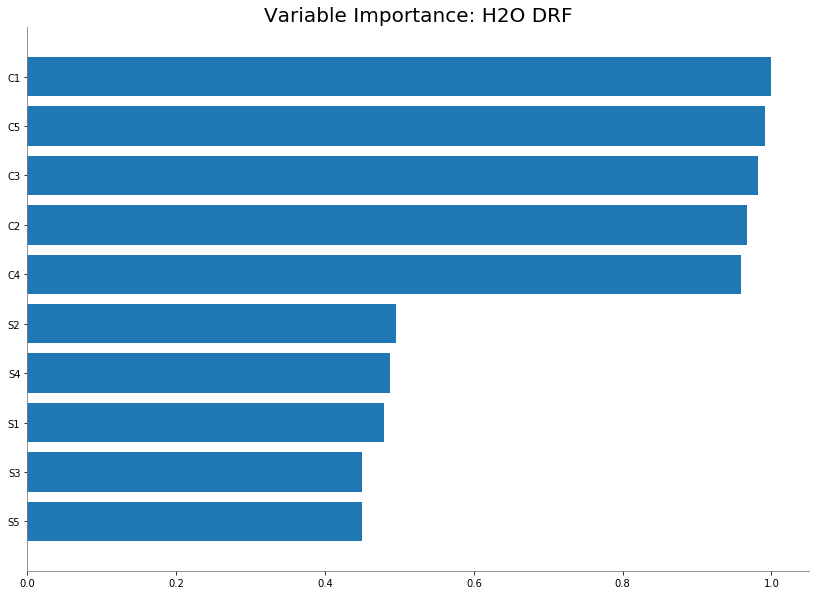

In [15]:
drf_default.varimp_plot()

In [16]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_default = H2OGradientBoostingEstimator(model_id = 'gbm_default',seed =1234)

In [17]:
gbm_default.train(x= features, y= 'hand', training_frame= data_train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


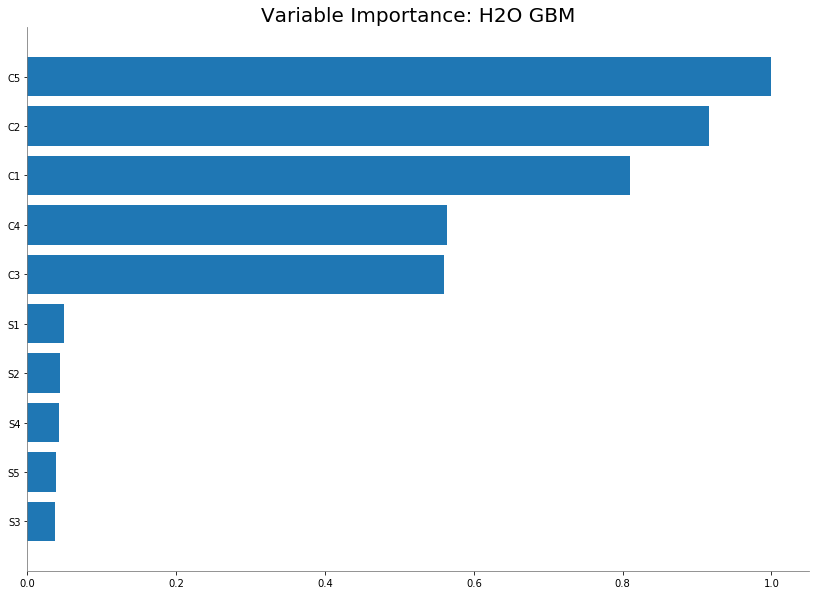

In [18]:
gbm_default.varimp_plot()

In [19]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
dnn_default = H2ODeepLearningEstimator(model_id='dnn_default', seed =1234)

In [20]:
dnn_default.train(x= features, y= 'hand', training_frame= data_train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


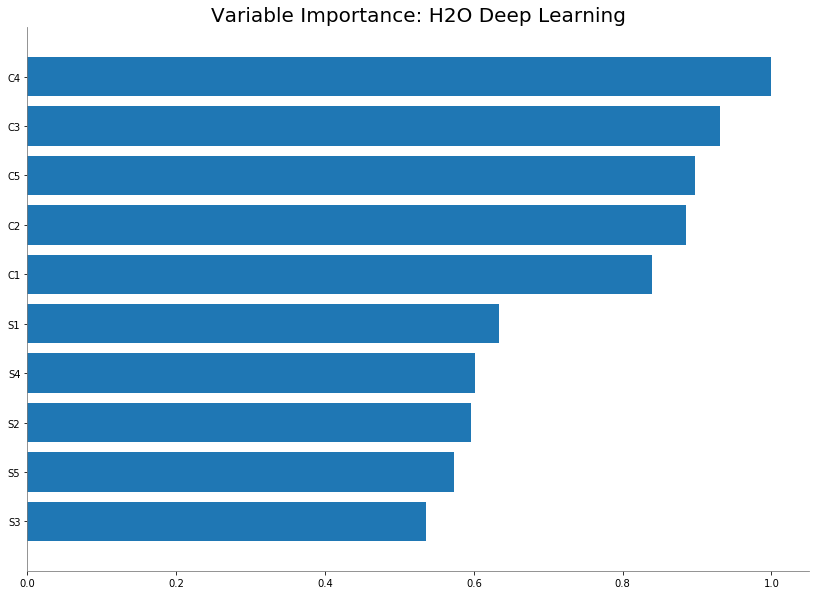

In [21]:
dnn_default.varimp_plot()

In [22]:
h2o.cluster().shutdown()

H2O session _sid_853f closed.
